In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
import numpy as np
import os

def detect_pink(image_path):

    try:
        img = cv2.imread(image_path)
        if img is None:
            print(f"Error: Could not read image at {image_path}")
            return False

        hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)


        lower_pink = np.array([140, 50, 50])
        upper_pink = np.array([170, 255, 255])

        mask = cv2.inRange(hsv_img, lower_pink, upper_pink)

        if np.count_nonzero(mask) > 0:
            return True
        else:
            return False

    except Exception as e:
        print(f"An error occurred: {e}")
        return False

In [ ]:

image_file = "/content/drive/MyDrive/dataset/train/masks/Oil (1249).png"


if os.path.exists(image_file):
    is_pink_present = detect_pink(image_file)
    print(f"Pink color detected in '{image_file}': {is_pink_present}")
else:
    print(f"Error: The file '{image_file}' was not found.")
    print("Please check the sidebar to make sure it was uploaded and the filename is correct.")

Pink color detected in '/content/drive/MyDrive/dataset/train/masks/Oil (1249).png': True


In [ ]:
import cv2
import numpy as np
import os
import csv

def detect_pink(image_path):

    try:
        img = cv2.imread(image_path)
        if img is None: return False
        hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        lower_pink = np.array([140, 50, 50])
        upper_pink = np.array([170, 255, 255])
        mask = cv2.inRange(hsv_img, lower_pink, upper_pink)
        return np.count_nonzero(mask) > 0
    except Exception:
        return False

SOURCE_IMAGE_DIR = "/content/drive/MyDrive/dataset/train/masks"

OUTPUT_CSV_FILE = "1train_spill_classification_results.csv"



print(f"Starting classification for images in: {SOURCE_IMAGE_DIR}")


results = []

all_files = os.listdir(SOURCE_IMAGE_DIR)
image_files = [f for f in all_files if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

print(f"Found {len(image_files)} images to process.")


for i, filename in enumerate(image_files):
    full_path = os.path.join(SOURCE_IMAGE_DIR, filename)


    is_spill = detect_pink(full_path)


    label = 1 if is_spill else 0


    results.append({'filename': filename, 'label': label})


    if (i + 1) % 100 == 0:
        print(f"  Processed {i + 1}/{len(image_files)} images...")


try:
    with open(OUTPUT_CSV_FILE, 'w', newline='') as csvfile:

        fieldnames = ['filename', 'label']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)


        writer.writeheader()

        writer.writerows(results)

    print(f"\n Success! Results have been saved to '{OUTPUT_CSV_FILE}'")
    print("You can find the file in the Colab sidebar and download it.")

except Exception as e:
    print(f"\n Error writing to CSV file: {e}")

Starting classification for images in: /content/drive/MyDrive/dataset/train/masks
Found 811 images to process.
  Processed 100/811 images...
  Processed 200/811 images...
  Processed 300/811 images...
  Processed 400/811 images...
  Processed 500/811 images...
  Processed 600/811 images...
  Processed 700/811 images...
  Processed 800/811 images...

✅ Success! Results have been saved to '1train_spill_classification_results.csv'
You can find the file in the Colab sidebar and download it.


In [ ]:
import pandas as pd
import os


csv_file_path = '/content/1train_spill_classification_results.csv'


if os.path.exists(csv_file_path):
    try:

        df = pd.read_csv(csv_file_path)


        if 'label' in df.columns:
            print(f"--- Analysis of '{csv_file_path}' ---")


            label_counts = df['label'].value_counts()


            print("\nTotal counts for each label:")
            print(label_counts)

            print("\nSummary:")

            spill_count = label_counts.get(1, 0)
            no_spill_count = label_counts.get(0, 0)

            print(f"  Images with Oil Spill (label 1): {spill_count}")
            print(f"  Images with No Spill (label 0):  {no_spill_count}")

        else:
            print(" Error: A 'label' column was not found in the CSV file.")

    except Exception as e:
        print(f"An error occurred while reading the file: {e}")
else:
    print(f" Error: The file '{csv_file_path}' was not found.")
    print("Please make sure the filename is correct and it's in your Colab sidebar.")

--- Analysis of '/content/1train_spill_classification_results.csv' ---

Total counts for each label:
label
1    633
0    178
Name: count, dtype: int64

Summary:
  Images with Oil Spill (label 1): 633
  Images with No Spill (label 0):  178


Please upload an image to augment:


Saving Oil (792).jpg to Oil (792).jpg

Successfully uploaded 'Oil (792).jpg'
Generating and displaying augmented images...


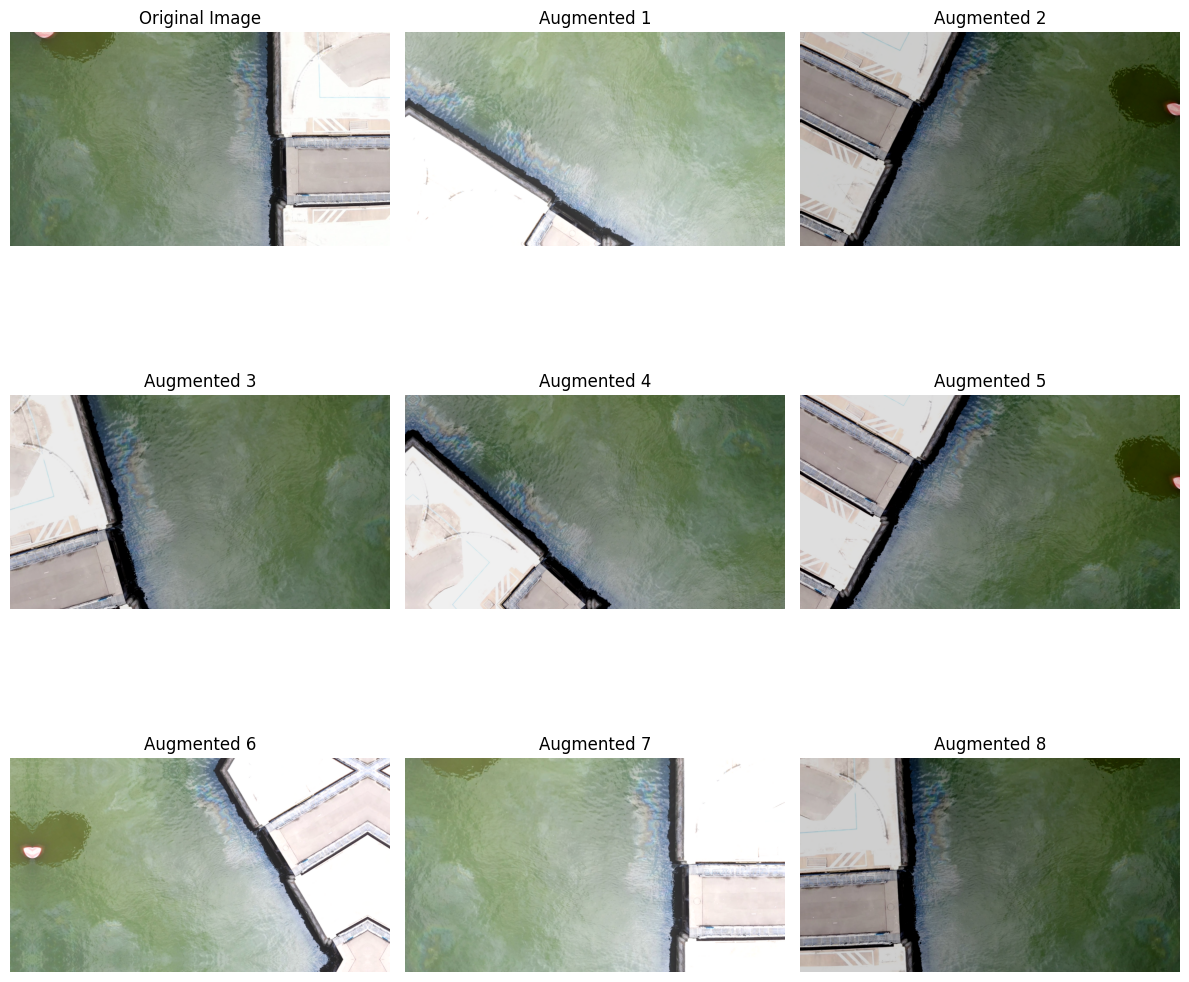

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
import cv2


data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal"),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomZoom(0.2),
  tf.keras.layers.RandomContrast(0.2),
  tf.keras.layers.RandomBrightness(0.2),
])


print("Please upload an image to augment:")
uploaded = files.upload()

try:
    image_name = next(iter(uploaded))
    print(f"\nSuccessfully uploaded '{image_name}'")


    img = cv2.imread(image_name)

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    img_tensor = tf.expand_dims(img, 0)



    print("Generating and displaying augmented images...")
    plt.figure(figsize=(12, 12))


    plt.subplot(3, 3, 1)
    plt.imshow(img)
    plt.title("Original Image")
    plt.axis("off")


    for i in range(8):
        augmented_image = data_augmentation(img_tensor)
        plt.subplot(3, 3, i + 2)

        plt.imshow(np.squeeze(augmented_image).astype("uint8"))
        plt.title(f"Augmented {i+1}")
        plt.axis("off")

    plt.tight_layout()
    plt.show()

except StopIteration:
    print("\nNo file was uploaded. Please run the cell again.")
except Exception as e:
    print(f"\nAn error occurred: {e}")

In [ ]:
import tensorflow as tf
import os
import shutil
import cv2
import pandas as pd
import numpy as np
import random



SOURCE_IMAGE_DIR = "/content/drive/MyDrive/dataset/train/images"


SOURCE_CSV_FILE = "/content/1train_spill_classification_results.csv"


BASE_OUTPUT_DIR = "/content/drive/My Drive/dataset_balanced/"



print(f"Reading CSV file: {SOURCE_CSV_FILE}")
df = pd.read_csv(SOURCE_CSV_FILE)


spill_files = df[df['label'] == 1]['filename'].tolist()
no_spill_files = df[df['label'] == 0]['filename'].tolist()

majority_count = len(spill_files)
minority_count = len(no_spill_files)

print(f"Found {majority_count} spill images and {minority_count} no-spill images.")



spill_output_dir = os.path.join(BASE_OUTPUT_DIR, "spill")
no_spill_output_dir = os.path.join(BASE_OUTPUT_DIR, "no_spill")

os.makedirs(spill_output_dir, exist_ok=True)
os.makedirs(no_spill_output_dir, exist_ok=True)


print("Copying original files to new sorted directories...")


for filename in spill_files:
    shutil.copy(os.path.join(SOURCE_IMAGE_DIR, filename), os.path.join(spill_output_dir, filename))


for filename in no_spill_files:
    shutil.copy(os.path.join(SOURCE_IMAGE_DIR, filename), os.path.join(no_spill_output_dir, filename))

print("Finished copying original files.")



data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.RandomRotation(0.3),
  tf.keras.layers.RandomZoom(0.3),
  tf.keras.layers.RandomContrast(0.3),
])

num_to_generate = majority_count - minority_count
print(f"Generating {num_to_generate} new augmented images for the 'no_spill' class...")

for i in range(num_to_generate):

    random_filename = random.choice(no_spill_files)
    img_path = os.path.join(SOURCE_IMAGE_DIR, random_filename)


    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_tensor = tf.expand_dims(img, 0)
    augmented_tensor = data_augmentation(img_tensor)
    augmented_image = np.squeeze(augmented_tensor.numpy()).astype(np.uint8)
    augmented_image_bgr = cv2.cvtColor(augmented_image, cv2.COLOR_RGB_BGR)


    base_name, extension = os.path.splitext(random_filename)
    new_filename = f"{base_name}_aug_{i}{extension}"
    output_path = os.path.join(no_spill_output_dir, new_filename)
    cv2.imwrite(output_path, augmented_image_bgr)

    if (i + 1) % 100 == 0:
        print(f"  Generated {i + 1}/{num_to_generate} images...")


final_spill_count = len(os.listdir(spill_output_dir))
final_no_spill_count = len(os.listdir(no_spill_output_dir))

print("\nAugmentation and balancing complete!")
print(f"The new balanced dataset is in: {BASE_OUTPUT_DIR}")
print(f"  Final 'spill' count:    {final_spill_count}")
print(f"  Final 'no_spill' count: {final_no_spill_count}")

In [ ]:
import pandas as pd
import os


csv_file_path = "/content/1train_spill_classification_results.csv"



print(f"Attempting to modify: {csv_file_path}")


if os.path.exists(csv_file_path):
    try:

        df = pd.read_csv(csv_file_path)


        filename_column = 'filename'

        if filename_column in df.columns:

            print("Changing .png extensions to .jpg...")
            df[filename_column] = df[filename_column].str.replace('.png', '.jpg', regex=False)


            df.to_csv(csv_file_path, index=False)

            print("\n Success! The CSV file has been updated.")

            print("\nFirst 5 rows of the updated file:")
            print(df.head())
        else:
            print(f" Error: Column '{filename_column}' not found in the CSV.")

    except Exception as e:
        print(f"An error occurred: {e}")
else:
    print(f" Error: The file '{csv_file_path}' was not found.")

Attempting to modify: /content/1train_spill_classification_results.csv
Changing .png extensions to .jpg...

✅ Success! The CSV file has been updated.

First 5 rows of the updated file:
         filename  label
0   Oil (992).jpg      1
1  Oil (1046).jpg      1
2   Oil (223).jpg      0
3   Oil (964).jpg      1
4   Oil (268).jpg      1


In [ ]:
import tensorflow as tf
import os
import cv2
import pandas as pd
import numpy as np
import random

SOURCE_IMAGE_DIR = "/content/drive/MyDrive/dataset/train/images"


SOURCE_CSV_FILE = "/content/1train_spill_classification_results.csv"


BASE_OUTPUT_DIR = "/content/drive/My Drive/dataset_balanced/"


print(f"Reading CSV file: {SOURCE_CSV_FILE}")
df = pd.read_csv(SOURCE_CSV_FILE)

no_spill_files = df[df['label'] == 0]['filename'].tolist()
majority_count = len(df[df['label'] == 1])
minority_count = len(no_spill_files)

num_to_generate = majority_count - minority_count
print(f"Original file copy is complete. Now generating {num_to_generate} new images...")



data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.RandomRotation(0.3),
  tf.keras.layers.RandomZoom(0.3),
  tf.keras.layers.RandomContrast(0.3),
])

no_spill_output_dir = os.path.join(BASE_OUTPUT_DIR, "no_spill")

for i in range(num_to_generate):
    random_filename = random.choice(no_spill_files)
    img_path = os.path.join(SOURCE_IMAGE_DIR, random_filename)

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_tensor = tf.expand_dims(img, 0)
    augmented_tensor = data_augmentation(img_tensor)
    augmented_image = np.squeeze(augmented_tensor.numpy()).astype(np.uint8)

    augmented_image_bgr = cv2.cvtColor(augmented_image, cv2.COLOR_RGB2BGR)

    base_name, extension = os.path.splitext(random_filename)
    new_filename = f"{base_name}_aug_{i}{extension}"
    output_path = os.path.join(no_spill_output_dir, new_filename)
    cv2.imwrite(output_path, augmented_image_bgr)

    if (i + 1) % 100 == 0:
        print(f"  Generated {i + 1}/{num_to_generate} images...")


spill_output_dir = os.path.join(BASE_OUTPUT_DIR, "spill")
final_spill_count = len(os.listdir(spill_output_dir))
final_no_spill_count = len(os.listdir(no_spill_output_dir))

print("\nAugmentation complete!")
print(f"The balanced dataset is in: {BASE_OUTPUT_DIR}")
print(f"  Final 'spill' count:    {final_spill_count}")
print(f"  Final 'no_spill' count: {final_no_spill_count}")

Reading CSV file: /content/1train_spill_classification_results.csv
Original file copy is complete. Now generating 455 new images...
  Generated 100/455 images...
  Generated 200/455 images...
  Generated 300/455 images...
  Generated 400/455 images...

✅ Augmentation complete!
The balanced dataset is in: /content/drive/My Drive/dataset_balanced/
  Final 'spill' count:    633
  Final 'no_spill' count: 633
